In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Configuración para visualización
sns.set(style="whitegrid")
%matplotlib inline

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [2]:
print("Ángel Roman Osma - romanosma@gmail.com") # Ejercicio 1: Imprime por pantalla tu nombre, apellido y email

Ángel Roman Osma - romanosma@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [3]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

# Mostrar los primeros 5 registros del DataFrame
print(df.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [4]:
# Mostrar estadísticas numéricas
print(df.describe())
# Mostrar descripción de todas las columnas (numéricas y categóricas)
print(df.describe(include='all'))

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         N

### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [5]:
# Eliminar la columna 'deck'
df = df.drop(columns=['deck'])

# Calcular la media de edad para imputación
media_edad = df['age'].mean()

# Rellenar valores nulos en la columna 'age' con la media
df['age'] = df['age'].fillna(media_edad)

# Mostrar el DataFrame resultante
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

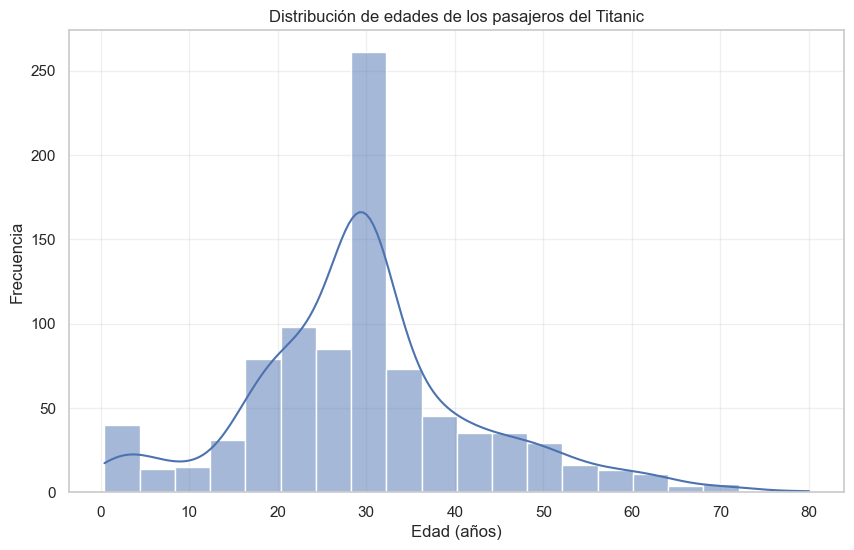

In [6]:
# Crear un histograma de la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribución de edades de los pasajeros del Titanic')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

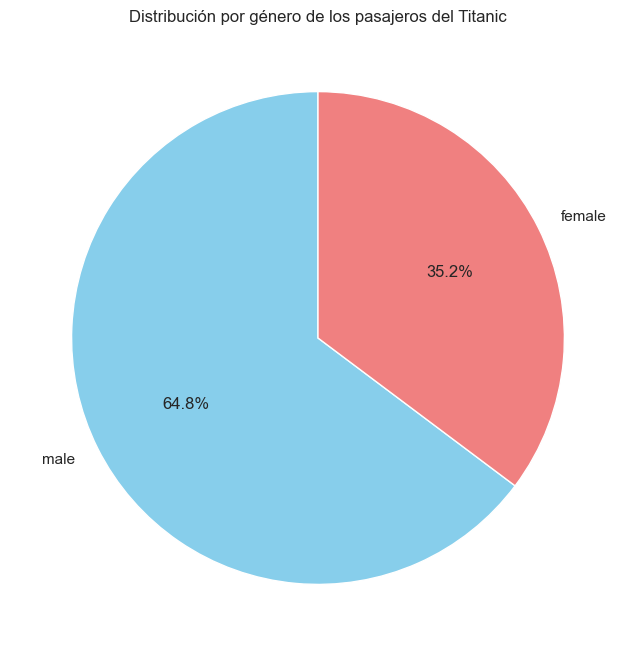

In [7]:
# Crear un gráfico circular de la distribución por género
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución por género de los pasajeros del Titanic')
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [8]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Separar el dataset en variables x e y
x = diamantes[['depth', 'table', 'price', 'x', 'y', 'z']]
y = diamantes['carat']

# Verificar las dimensiones
print(f"Dimensiones de x: {x.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de x: (53940, 6)
Dimensiones de y: (53940,)


#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [9]:
# Dividir en conjuntos de entrenamiento y prueba con 40% para test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Mostrar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento X: {X_train.shape} ({X_train.shape[0]/x.shape[0]:.1%})")
print(f"Tamaño del conjunto de prueba X: {X_test.shape} ({X_test.shape[0]/x.shape[0]:.1%})")
print(f"Tamaño del conjunto de entrenamiento y: {y_train.shape[0]}")
print(f"Tamaño del conjunto de prueba y: {y_test.shape[0]}")

Tamaño del conjunto de entrenamiento X: (32364, 6) (60.0%)
Tamaño del conjunto de prueba X: (21576, 6) (40.0%)
Tamaño del conjunto de entrenamiento y: 32364
Tamaño del conjunto de prueba y: 21576


#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [10]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
coeficientes = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': modelo_regresion.coef_
})
print(coeficientes)
print(f"Intercepto: {modelo_regresion.intercept_:.4f}")

Coeficientes del modelo:
  Característica  Coeficiente
0          depth     0.018355
1          table     0.004379
2          price     0.000032
3              x     0.300417
4              y     0.008601
5              z     0.000749
Intercepto: -2.4887


#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

Error cuadrático medio (MSE): 0.0066
Coeficiente de determinación (R²): 0.9705


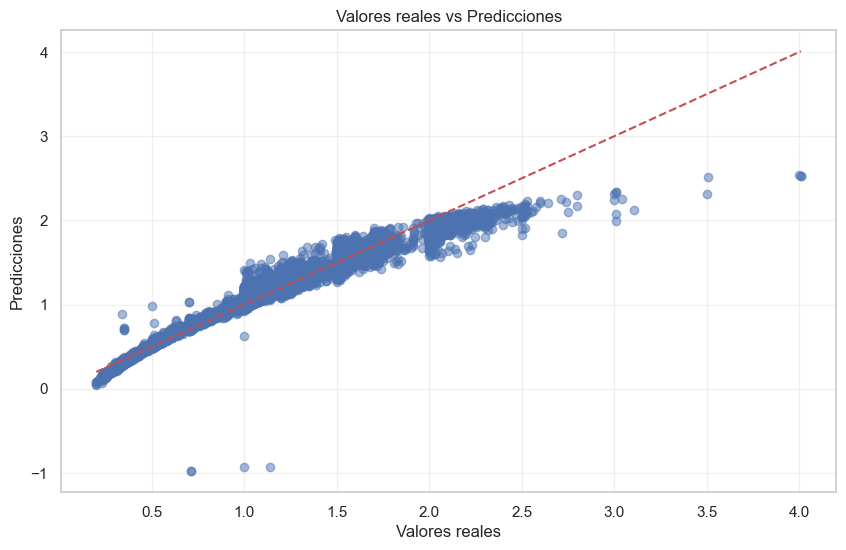


Comparación de valores reales y predicciones:
   Valor Real  Predicción
0        0.24    0.143461
1        0.58    0.617044
2        0.40    0.405190
3        0.43    0.441609
4        1.55    1.421778
5        1.00    0.948672
6        0.51    0.534453
7        0.52    0.549293
8        0.62    0.665909
9        1.14    1.125109


In [11]:
# Realizar predicciones con el modelo de regresión lineal
y_pred = modelo_regresion.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = modelo_regresion.score(X_test, y_test)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar algunas predicciones
resultados = pd.DataFrame({
    'Valor Real': y_test.iloc[:10].values,
    'Predicción': y_pred[:10]
})
print("\nComparación de valores reales y predicciones:")
print(resultados)

### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [12]:
# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Mostrar resumen estadístico de los datos numéricos
print("Resumen estadístico del dataset de cáncer de mama:")
print(X.describe())

# Mostrar información sobre la variable objetivo
print("\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"Porcentaje de clase 0 (maligno): {(y == 0).mean():.2%}")
print(f"Porcentaje de clase 1 (benigno): {(y == 1).mean():.2%}")

Resumen estadístico del dataset de cáncer de mama:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.01938

#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [13]:
# Dividir en conjuntos de entrenamiento y prueba con 40% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Mostrar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento X: {X_train.shape} ({X_train.shape[0]/X.shape[0]:.1%})")
print(f"Tamaño del conjunto de prueba X: {X_test.shape} ({X_test.shape[0]/X.shape[0]:.1%})")
print(f"Tamaño del conjunto de entrenamiento y: {y_train.shape[0]}")
print(f"Tamaño del conjunto de prueba y: {y_test.shape[0]}")

Tamaño del conjunto de entrenamiento X: (341, 30) (59.9%)
Tamaño del conjunto de prueba X: (228, 30) (40.1%)
Tamaño del conjunto de entrenamiento y: 341
Tamaño del conjunto de prueba y: 228


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [14]:
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = log_reg.score(X_train, y_train)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")

Precisión en el conjunto de entrenamiento: 0.9648


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

Precisión (accuracy) en el conjunto de prueba: 0.9693

Informe de clasificación:
              precision    recall  f1-score   support

     Maligno       0.95      0.96      0.96        80
     Benigno       0.98      0.97      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



<Figure size 800x600 with 0 Axes>

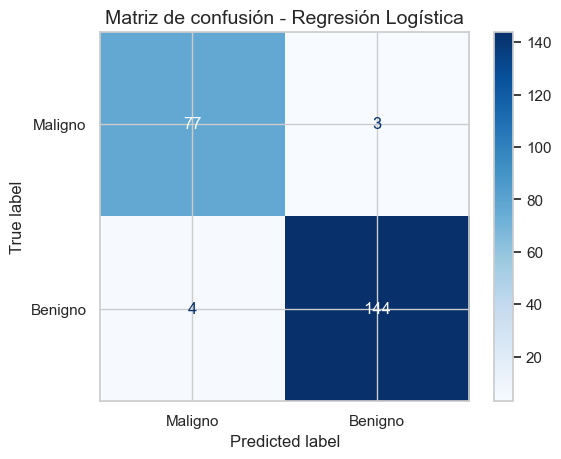


Comparación de valores reales y predicciones:
   Valor Real  Predicción
0           1           1
1           0           0
2           0           0
3           1           1
4           1           1
5           0           0
6           0           0
7           0           0
8           1           1
9           1           1


In [15]:
# Realizar predicciones con el modelo de regresión logística
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (accuracy) en el conjunto de prueba: {accuracy:.4f}")

# Mostrar informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Regresión Logística', fontsize=14)
plt.show()

# Mostrar algunas predicciones
resultados = pd.DataFrame({
    'Valor Real': y_test.iloc[:10].values,
    'Predicción': y_pred[:10]
})
print("\nComparación de valores reales y predicciones:")
print(resultados)

### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [16]:
# Cargar el dataset de pingüinos
df_penguins = sns.load_dataset("penguins")

# Mostrar los primeros registros
print(df_penguins.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(f"Número de filas: {df_penguins.shape[0]}")
print(f"Número de columnas: {df_penguins.shape[1]}")
print("\nTipos de datos:")
print(df_penguins.dtypes)
print("\nValores nulos por columna:")
print(df_penguins.isnull().sum())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Información del dataset:
Número de filas: 344
Número de columnas: 7

Tipos de datos:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Valores nulos por columna:
species               0
island                0
bill_length_mm        2
bi

#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [17]:
# Eliminar filas con valores nulos
df_penguins_clean = df_penguins.dropna()
print(f"Filas después de eliminar valores nulos: {df_penguins_clean.shape[0]}")

# Preparar características y variable objetivo
# Convertir variables categóricas a numéricas
X_penguins = pd.get_dummies(df_penguins_clean.drop('species', axis=1), drop_first=True)
y_penguins = df_penguins_clean['species']

# Dividir en conjuntos de entrenamiento y prueba con 40% para test
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(
    X_penguins, y_penguins, test_size=0.4, random_state=42
)

# Mostrar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento X: {X_train_penguins.shape} ({X_train_penguins.shape[0]/X_penguins.shape[0]:.1%})")
print(f"Tamaño del conjunto de prueba X: {X_test_penguins.shape} ({X_test_penguins.shape[0]/X_penguins.shape[0]:.1%})")
print(f"Tamaño del conjunto de entrenamiento y: {y_train_penguins.shape[0]}")
print(f"Tamaño del conjunto de prueba y: {y_test_penguins.shape[0]}")

Filas después de eliminar valores nulos: 333
Tamaño del conjunto de entrenamiento X: (199, 7) (59.8%)
Tamaño del conjunto de prueba X: (134, 7) (40.2%)
Tamaño del conjunto de entrenamiento y: 199
Tamaño del conjunto de prueba y: 134


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [18]:
# Elegimos Random Forest como modelo de clasificación
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_penguins, y_train_penguins)

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = rf_model.score(X_train_penguins, y_train_penguins)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")

# Mostrar importancia de características
feature_importance = pd.DataFrame({
    'Característica': X_train_penguins.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de características:")
print(feature_importance)

Precisión en el conjunto de entrenamiento: 1.0000

Importancia de características:
      Característica  Importancia
0     bill_length_mm     0.323223
1      bill_depth_mm     0.250284
2  flipper_length_mm     0.186269
4       island_Dream     0.106994
3        body_mass_g     0.103871
5   island_Torgersen     0.024185
6           sex_Male     0.005174


#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

Precisión (accuracy) en el conjunto de prueba: 0.9925

Informe de clasificación:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        65
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        42

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



<Figure size 800x600 with 0 Axes>

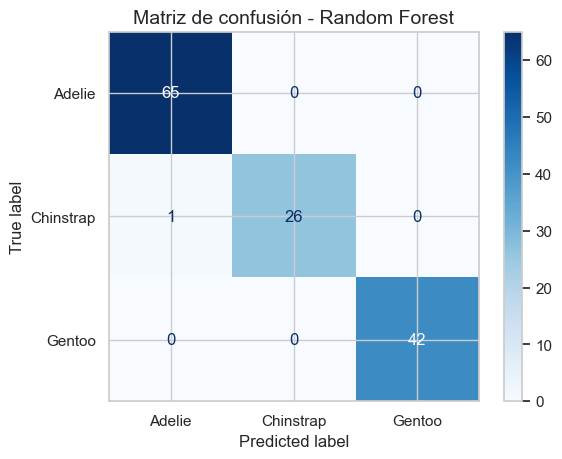


Comparación de valores reales y predicciones:
  Valor Real Predicción
0     Adelie     Adelie
1     Gentoo     Gentoo
2     Adelie     Adelie
3  Chinstrap  Chinstrap
4     Adelie     Adelie
5     Gentoo     Gentoo
6     Gentoo     Gentoo
7  Chinstrap  Chinstrap
8  Chinstrap  Chinstrap
9  Chinstrap  Chinstrap


In [19]:
# Realizar predicciones con el modelo Random Forest
y_pred_penguins = rf_model.predict(X_test_penguins)

# Evaluar el modelo
accuracy = accuracy_score(y_test_penguins, y_pred_penguins)
print(f"Precisión (accuracy) en el conjunto de prueba: {accuracy:.4f}")

# Mostrar informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test_penguins, y_pred_penguins))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_penguins, y_pred_penguins)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Random Forest', fontsize=14)
plt.show()

# Mostrar algunas predicciones
resultados = pd.DataFrame({
    'Valor Real': y_test_penguins.iloc[:10].values,
    'Predicción': y_pred_penguins[:10]
})
print("\nComparación de valores reales y predicciones:")
print(resultados)

### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [20]:
# Cargar el dataset de abulones
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df_abalone = pd.read_csv(url, header=None)
df_abalone.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

# Guardar una copia antes de eliminar la columna Sex para el ejercicio 6.2
df_abalone_full = df_abalone.copy()

# Eliminar la columna Sex para el resumen estadístico
df_abalone = df_abalone.drop("Sex", axis=1)

# Mostrar resumen estadístico de los datos numéricos
print("Resumen estadístico del dataset de abulones:")
print(df_abalone.describe())

# Mostrar información adicional
print("\nInformación del dataset:")
print(f"Número de filas: {df_abalone.shape[0]}")
print(f"Número de columnas: {df_abalone.shape[1]}")

Resumen estadístico del dataset de abulones:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000

#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [21]:
# Separar el dataset en variables x e y
x_abalone = df_abalone_full.drop('Sex', axis=1)
y_abalone = df_abalone_full['Sex']

# Verificar las dimensiones
print(f"Dimensiones de x: {x_abalone.shape}")
print(f"Dimensiones de y: {y_abalone.shape}")

# Mostrar distribución de la variable objetivo
print("\nDistribución de la variable objetivo (Sex):")
print(y_abalone.value_counts())
print("\nPorcentajes:")
print(y_abalone.value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Dimensiones de x: (4177, 8)
Dimensiones de y: (4177,)

Distribución de la variable objetivo (Sex):
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Porcentajes:
Sex
M    36.58%
I    32.13%
F    31.29%
Name: proportion, dtype: object


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [22]:
# Dividir en conjuntos de entrenamiento y prueba con 40% para test
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(
    x_abalone, y_abalone, test_size=0.4, random_state=42
)

# Mostrar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento X: {X_train_abalone.shape} ({X_train_abalone.shape[0]/x_abalone.shape[0]:.1%})")
print(f"Tamaño del conjunto de prueba X: {X_test_abalone.shape} ({X_test_abalone.shape[0]/x_abalone.shape[0]:.1%})")
print(f"Tamaño del conjunto de entrenamiento y: {y_train_abalone.shape[0]}")
print(f"Tamaño del conjunto de prueba y: {y_test_abalone.shape[0]}")

Tamaño del conjunto de entrenamiento X: (2506, 8) (60.0%)
Tamaño del conjunto de prueba X: (1671, 8) (40.0%)
Tamaño del conjunto de entrenamiento y: 2506
Tamaño del conjunto de prueba y: 1671


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [23]:
# Crear y entrenar el modelo KNN con n_neighbors=3
# Nota: El enunciado menciona regresión logística pero pide n_neighbors=3, que es un parámetro de KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_abalone, y_train_abalone)

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = knn_model.score(X_train_abalone, y_train_abalone)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")

# Evaluar el modelo en el conjunto de prueba
test_accuracy = knn_model.score(X_test_abalone, y_test_abalone)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

Precisión en el conjunto de entrenamiento: 0.7322
Precisión en el conjunto de prueba: 0.5320


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

Informe de clasificación:
              precision    recall  f1-score   support

           F       0.42      0.49      0.45       524
           I       0.73      0.67      0.70       555
           M       0.47      0.44      0.46       592

    accuracy                           0.53      1671
   macro avg       0.54      0.53      0.54      1671
weighted avg       0.54      0.53      0.54      1671



<Figure size 1000x800 with 0 Axes>

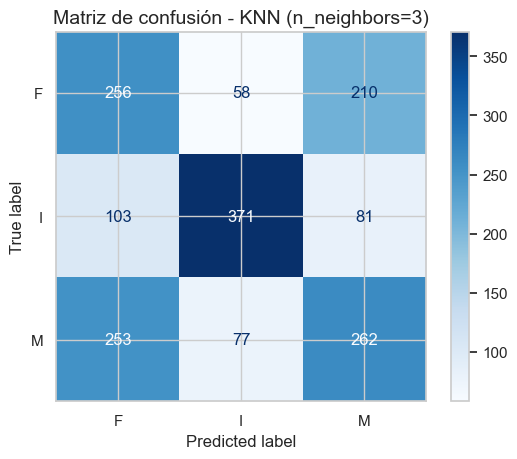


Comparación de valores reales y predicciones:
  Valor Real Predicción
0          M          F
1          M          M
2          F          F
3          F          F
4          M          M
5          I          F
6          I          I
7          M          M
8          I          I
9          F          F


In [24]:
# Realizar predicciones con el modelo KNN
y_pred_abalone = knn_model.predict(X_test_abalone)

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test_abalone, y_pred_abalone))

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_abalone, y_pred_abalone)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - KNN (n_neighbors=3)', fontsize=14)
plt.show()

# Mostrar algunas predicciones
resultados = pd.DataFrame({
    'Valor Real': y_test_abalone.iloc[:10].values,
    'Predicción': y_pred_abalone[:10]
})
print("\nComparación de valores reales y predicciones:")
print(resultados)